# ***Decision Tree for Classification***
---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
socialdata = pd.read_csv('Social_Network_Ads.csv')
socialdata.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [4]:
socialdata['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
socialdata.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
socialdata.drop(columns=['User ID','Gender'], inplace=True)

In [7]:
socialdata.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [8]:
x = socialdata.iloc[:,:-1]
y = socialdata['Purchased']

In [9]:
# using the standard scaler to It ensures that all features contribute equally to the model
# avoiding dominance by features with larger values or different units


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100

83.75

In [12]:
dt.predict([[35,20000]])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

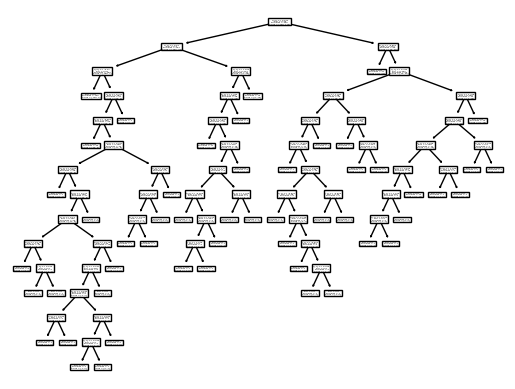

In [13]:
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()

In [14]:
# Checking the classifier for the entropy

dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(x,y)
dt1.score(x_test,y_test)*100

100.0

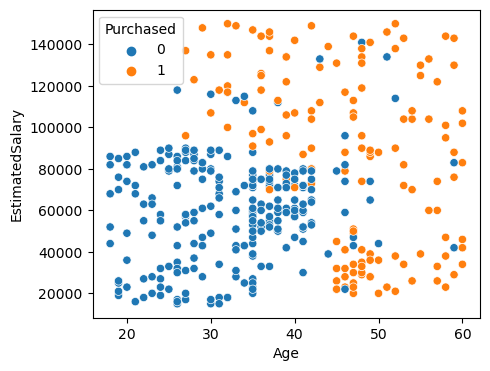

In [15]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='Age', y='EstimatedSalary', data=socialdata,hue='Purchased')
plt.show()

In [16]:
# mlextends to plot the region where the decison or the partision is made

from mlxtend.plotting import plot_decision_regions

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


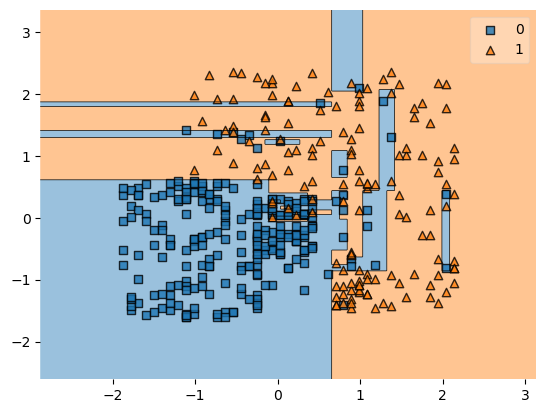

In [17]:
# plt.figure(figsize=(5,4))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


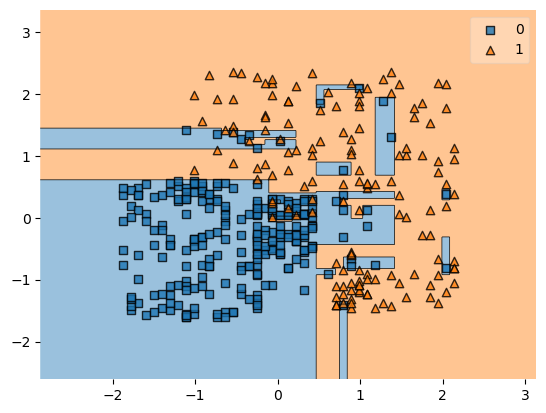

In [18]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

#### ***Pre and Post Pruning***
---

In [19]:
print(dt.score(x_test,y_test)*100)
print(dt.score(x_train,y_train)*100)

83.75
99.6875


In [20]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
print(dt.score(x_test,y_test)*100)
print(dt.score(x_train,y_train)*100)

90.0
93.4375


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


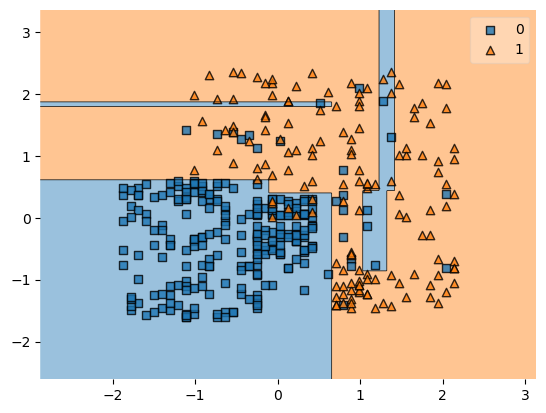

In [22]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

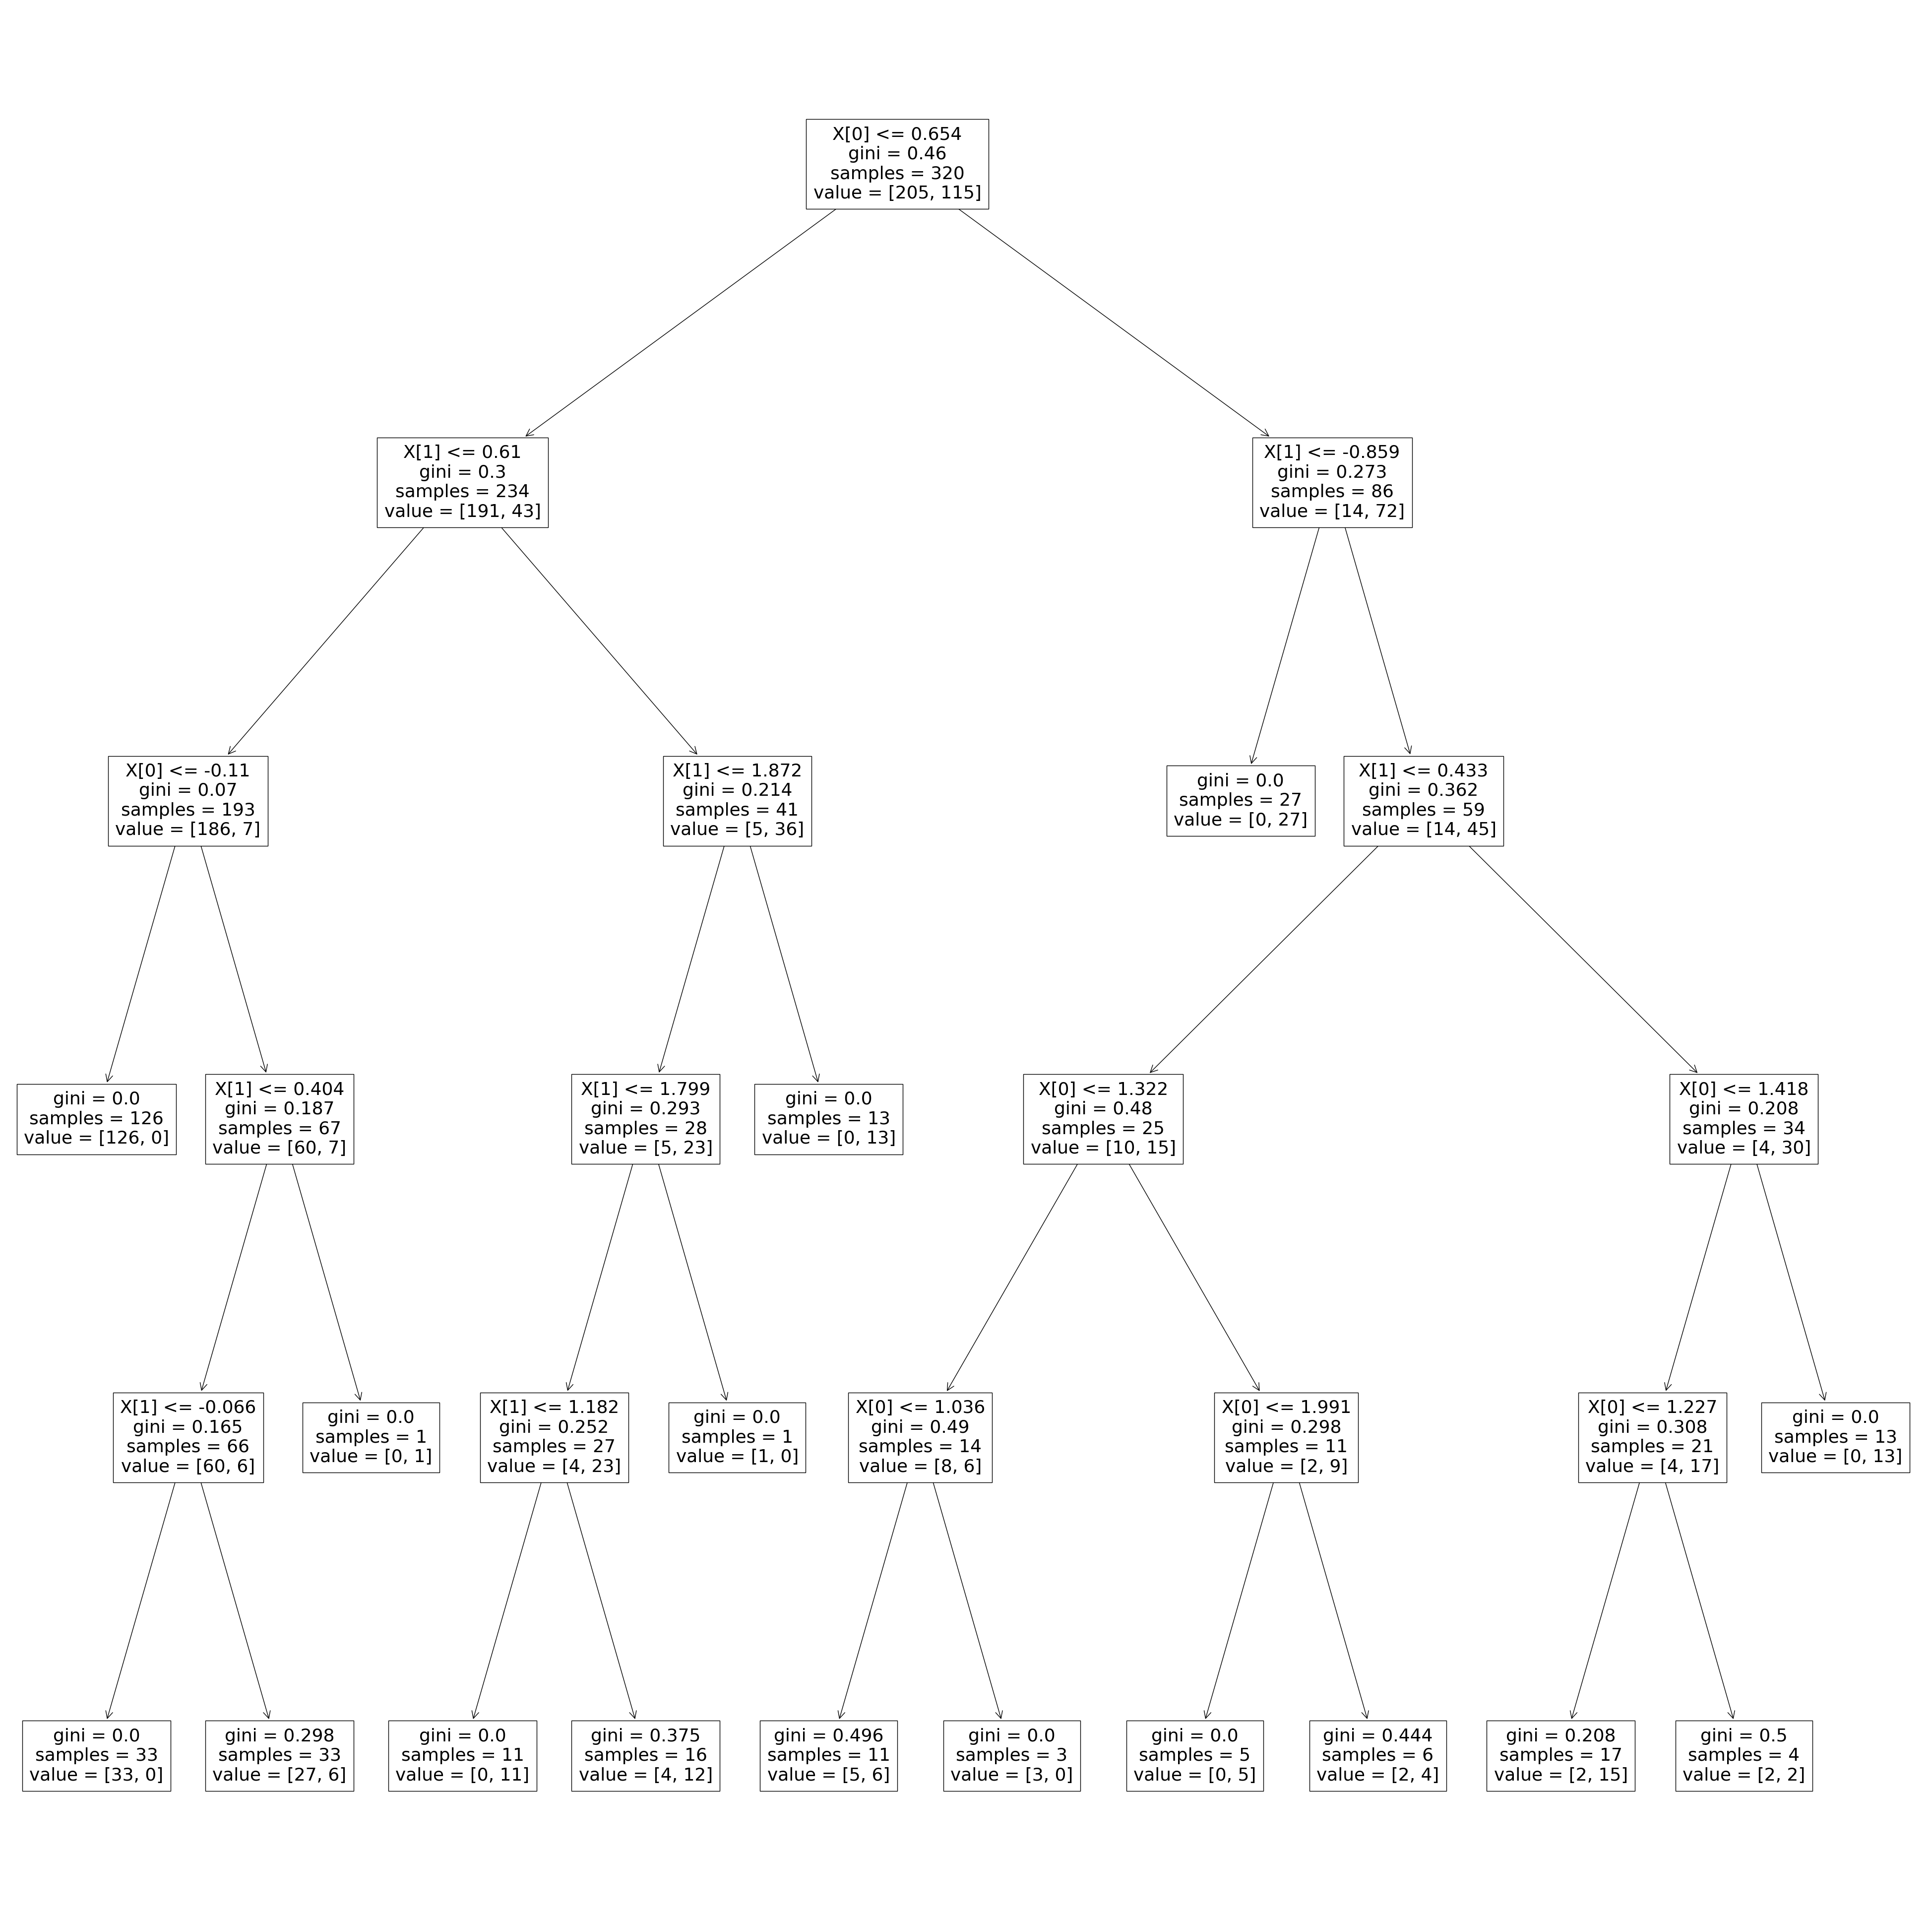

In [23]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.show()

In [24]:
# Using the Post Pruning

for i in range(1,20):
    dt3 = DecisionTreeClassifier(max_depth=i)
    dt3.fit(x_train,y_train)
    print(i," - ",dt3.score(x_train,y_train)*100," - " ,dt3.score(x_test,y_test)*100)

1  -  82.1875  -  90.0
2  -  91.875  -  91.25
3  -  91.875  -  91.25
4  -  93.125  -  91.25
5  -  93.4375  -  90.0
6  -  95.0  -  86.25
7  -  96.875  -  85.0
8  -  97.5  -  85.0
9  -  98.125  -  85.0
10  -  98.4375  -  85.0
11  -  99.0625  -  83.75
12  -  99.0625  -  83.75
13  -  99.6875  -  83.75
14  -  99.6875  -  83.75
15  -  99.6875  -  83.75
16  -  99.6875  -  83.75
17  -  99.6875  -  83.75
18  -  99.6875  -  83.75
19  -  99.6875  -  83.75


# ***Decision Tree for Regression***
---

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
salary2data = pd.read_csv('salary2.csv')
salary2data.head()

,Age,Experience,Salary
0,59,34,124917.718182
1,49,39,131287.516258
2,35,21,80590.641399
3,28,26,75242.641247
4,41,34,106319.199499


In [32]:
salary2data.shape

(100, 3)

In [33]:
salary2data.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

<Figure size 500x400 with 0 Axes>

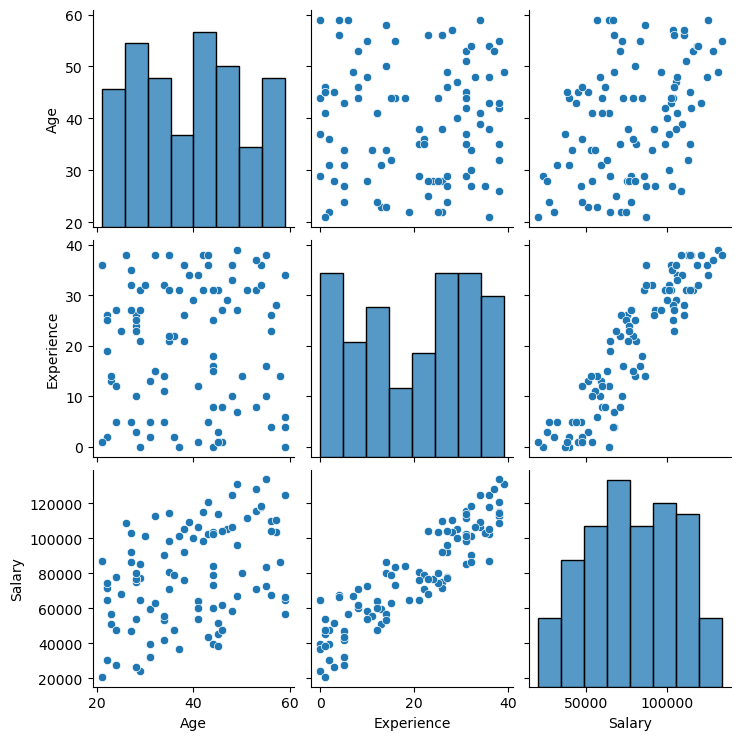

In [35]:
# plt.figure(figsize=(5,4))
sns.pairplot(data=salary2data)
plt.show()

In [36]:
x = salary2data.iloc[:,:-1]
y = salary2data['Salary']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [39]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test)*100

86.47417731121574

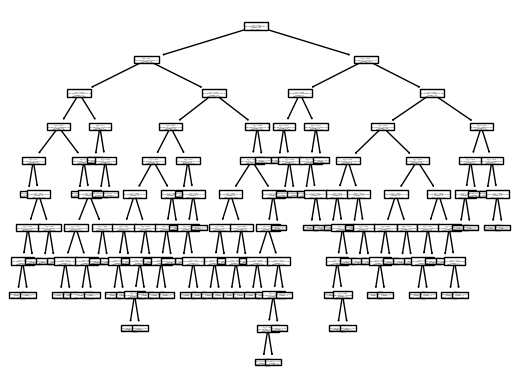

In [41]:
# plt.figure(figsize=(50,50))
plot_tree(dtr)
plt.show()

In [43]:
print(dtr.score(x_train,y_train)*100," ",dtr.score(x_test,y_test)*100)

99.94854361137212   86.47417731121574


# ***K Nearest Neighbours***
---

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [45]:
socialdata.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [46]:
socialdata.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

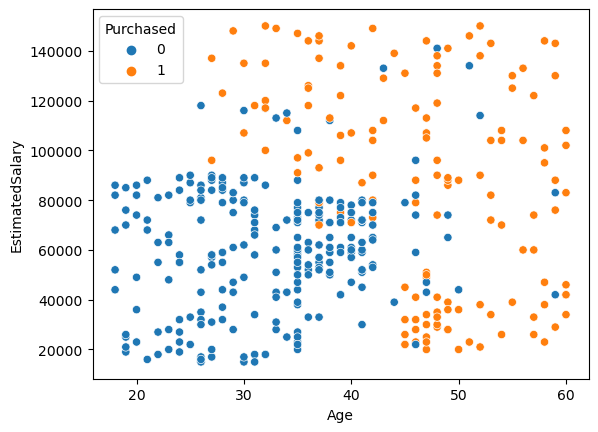

In [48]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=socialdata, hue='Purchased')
plt.show()

In [49]:
x = socialdata.iloc[:,:-1]
y = socialdata['Purchased']

In [50]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(x)
x = pd.DataFrame(s.transform(x), columns=x.columns)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)*100

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


92.5

In [54]:
for i in range(1,30):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i," - ",knn1.score(x_train,y_train)*100," - ",knn1.score(x_test,y_test)*100)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

1  -  99.6875  -  85.0
2  -  91.5625  -  86.25
3  -  92.5  -  91.25
4  -  91.875  -  92.5
5  -  90.9375  -  92.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

6  -  90.9375  -  90.0
7  -  91.875  -  93.75
8  -  90.625  -  92.5
9  -  91.25  -  93.75


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

10  -  90.625  -  92.5
11  -  90.9375  -  92.5
12  -  91.25  -  92.5
13  -  91.5625  -  92.5
14  -  90.625  -  92.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

15  -  90.625  -  92.5
16  -  90.0  -  92.5
17  -  90.625  -  92.5
18  -  90.0  -  92.5
19  -  90.9375  -  92.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

20  -  90.0  -  93.75
21  -  90.3125  -  92.5
22  -  90.0  -  93.75
23  -  90.3125  -  93.75
24  -  89.375  -  93.75
25  -  90.0  -  93.75


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

26  -  89.375  -  93.75
27  -  89.375  -  92.5
28  -  88.75  -  93.75
29  -  88.75  -  93.75


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


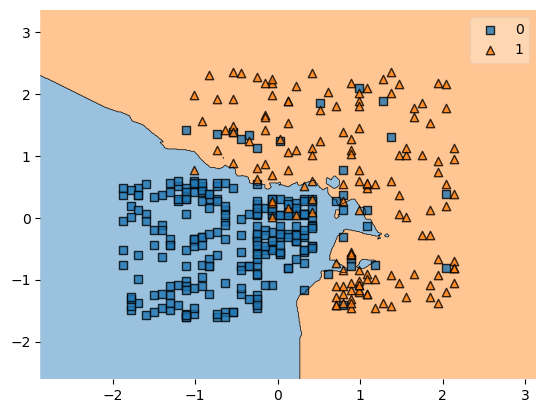

In [55]:
plot_decision_regions(x.to_numpy(), y.to_numpy(),clf=knn)
plt.show()

# ***KNN Regreession***
---

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
salarydata = pd.read_csv('salary2.csv')
salarydata.head()

,Age,Experience,Salary
0,59,34,124917.718182
1,49,39,131287.516258
2,35,21,80590.641399
3,28,26,75242.641247
4,41,34,106319.199499


In [9]:
x = salarydata.iloc[:,:-1]
y = salarydata['Salary']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
knr.score(x_test,y_test)*100

93.05531590387174